In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [163]:
# load data
features = ['id','cycle','setting1','setting2','setting3','s1','s2', 
            's3', 's4','s5', 's6',  's7', 's8', 's9','s10', 
            's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21']

datatrain = pd.read_csv('data/train.csv')
datatest = pd.read_csv('data/test.csv')

In [164]:
data_train = datatrain[features]
data_test = datatest[features]

In [165]:
data_train['RUL'] = datatrain['ttf']

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [166]:
data_train.describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,0.071919,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000


In [167]:
data_train.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [168]:
y_true = datatest['ttf'].copy
y_true

<bound method NDFrame.copy of 0     112
1      98
2      69
3      82
4      91
     ... 
95    137
96     82
97     59
98    117
99     20
Name: ttf, Length: 100, dtype: int64>

In [169]:
data_train.shape

(20631, 27)

In [170]:
data_train.isnull().sum()

id          0
cycle       0
setting1    0
setting2    0
setting3    0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
s7          0
s8          0
s9          0
s10         0
s11         0
s12         0
s13         0
s14         0
s15         0
s16         0
s17         0
s18         0
s19         0
s20         0
s21         0
RUL         0
dtype: int64

In [171]:
data_train.id.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Life of Engines')

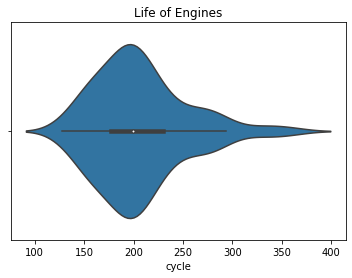

In [172]:
temp_df = data_train[["id","cycle"]].groupby("id").max()
sns.violinplot(temp_df.cycle)
plt.title("Life of Engines")

In [173]:

data_train[["id","cycle"]].groupby("id").max().sort_values(by = ["cycle"], ascending= False).head(5)

,cycle
id,
69,362
92,341
96,336
67,313
83,293


In [174]:

data_train[["id","cycle"]].groupby("id").max().sort_values(by = ["cycle"], ascending= False).tail(5)

,cycle
id,
24,147
57,137
70,137
91,135
39,128


In [175]:

temp_df = data_train.groupby('id').std()
temp_df.head()

,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,...,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
id,,,,,,,,,,,,,,,,,,,,,
1,55.569776,0.001953,0.000282,0.0,0.0,0.486795,5.759776,8.565610,0.0,0.000000,...,0.076960,5.563129,0.034125,0.0,1.475661,0.0,0.0,0.166998,0.105101,55.569776
2,82.993976,0.002320,0.000298,0.0,0.0,0.560214,6.596730,9.737248,0.0,0.002491,...,0.063861,8.683012,0.041128,0.0,1.647280,0.0,0.0,0.199332,0.114796,82.993976
3,51.816986,0.002145,0.000290,0.0,0.0,0.474190,6.386222,8.610126,0.0,0.001482,...,0.041219,29.439715,0.036620,0.0,1.570773,0.0,0.0,0.166112,0.104734,51.816986
4,54.703748,0.002033,0.000286,0.0,0.0,0.441446,6.109152,7.737463,0.0,0.000727,...,0.034819,30.691780,0.031947,0.0,1.602848,0.0,0.0,0.159302,0.093804,54.703748
5,77.797815,0.002119,0.000279,0.0,0.0,0.551542,7.060648,9.782341,0.0,0.002503,...,0.056445,16.480153,0.038658,0.0,1.740057,0.0,0.0,0.187133,0.112705,77.797815


In [176]:
temp_df.sum(axis = 0) == 0

cycle       False
setting1    False
setting2    False
setting3     True
s1           True
s2          False
s3          False
s4          False
s5           True
s6          False
s7          False
s8          False
s9          False
s10          True
s11         False
s12         False
s13         False
s14         False
s15         False
s16          True
s17         False
s18          True
s19          True
s20         False
s21         False
RUL         False
dtype: bool

In [177]:
col_train = ['cycle','setting1','setting2','s2', 
            's3', 's4','s6',  's7', 's8', 's9',
            's11', 's12', 's13', 's14', 's15',  
            's17',  's20', 's21']

## kiểm tra và xử lí giá trị ngoại lai

<AxesSubplot:>

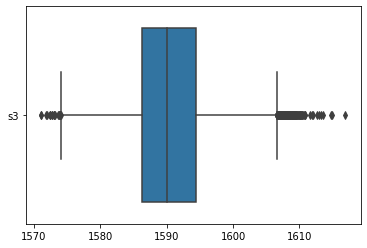

In [178]:
sns.boxplot( data = data_train[col_names], orient="h", order=['s3'])

In [179]:
def outliers(s):
    iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
    upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
    lower_bound = np.quantile(s, 0.25)-(1.5*iqr)
    f = []
    for i in s:
        if i > upper_bound:
            f.append(i)
        elif i < lower_bound:
            f.append(i)
    sums = len(f)
    pros = len(f)/len(s)*100
    d = {'IQR':iqr,
         'Upper Bound':upper_bound,
        'Lower Bound':lower_bound,
        'Sum outliers': sums,'percentage outliers':pros}
    d = pd.DataFrame(d.items(),columns = ['sub','values'])
    return(d)
    
outliers(data_train.s3)

,sub,values
0,IQR,8.120000
1,Upper Bound,1606.560000
2,Lower Bound,1574.080000
3,Sum outliers,165.000000
4,percentage outliers,0.799767


In [180]:
s = data_train['s2']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s2'] = data_train.s2.mask(data_train.s2 > upper_bound,data_train.s2.median())
data_train['s2'] = data_train.s2.mask(data_train.s2 < lower_bound,data_train.s2.median())

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [181]:
s = data_train['s3']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s3'] = data_train.s3.mask(data_train.s3 > upper_bound,data_train.s3.median())
data_train['s3'] = data_train.s3.mask(data_train.s3 < lower_bound,data_train.s3.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [182]:
s = data_train['s4']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s4'] = data_train.s4.mask(data_train.s4 > upper_bound,data_train.s4.median())
data_train['s4'] = data_train.s4.mask(data_train.s4 < lower_bound,data_train.s4.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [183]:
s = data_train['s7']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s7'] = data_train.s7.mask(data_train.s7 > upper_bound,data_train.s7.median())
data_train['s7'] = data_train.s7.mask(data_train.s7 < lower_bound,data_train.s7.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [184]:
s = data_train['s8']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s8'] = data_train.s8.mask(data_train.s8 > upper_bound,data_train.s8.median())
data_train['s8'] = data_train.s8.mask(data_train.s8 < lower_bound,data_train.s8.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [185]:
s = data_train['s9']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s9'] = data_train.s9.mask(data_train.s9 > upper_bound,data_train.s9.median())
data_train['s9'] = data_train.s9.mask(data_train.s9 < lower_bound,data_train.s9.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [186]:
s = data_train['s11']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s11'] = data_train.s11.mask(data_train.s11 > upper_bound,data_train.s11.median())
data_train['s11'] = data_train.s11.mask(data_train.s11 < lower_bound,data_train.s11.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [187]:
s = data_train['s12']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s12'] = data_train.s12.mask(data_train.s12 > upper_bound,data_train.s12.median())
data_train['s12'] = data_train.s12.mask(data_train.s12 < lower_bound,data_train.s12.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [188]:
s = data_train['s13']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s13'] = data_train.s13.mask(data_train.s13 > upper_bound,data_train.s13.median())
data_train['s13'] = data_train.s13.mask(data_train.s13 < lower_bound,data_train.s13.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [189]:
s = data_train['s14']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s14'] = data_train.s14.mask(data_train.s14 > upper_bound,data_train.s14.median())
data_train['s14'] = data_train.s14.mask(data_train.s14 < lower_bound,data_train.s14.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [190]:
s = data_train['s15']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s15'] = data_train.s15.mask(data_train.s15 > upper_bound,data_train.s15.median())
data_train['s15'] = data_train.s15.mask(data_train.s15 < lower_bound,data_train.s15.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [191]:
s = data_train['s17']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s17'] = data_train.s17.mask(data_train.s17 > upper_bound,data_train.s17.median())
data_train['s17'] = data_train.s17.mask(data_train.s17 < lower_bound,data_train.s17.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [192]:
s = data_train['s20']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s20'] = data_train.s20.mask(data_train.s20 > upper_bound,data_train.s20.median())
data_train['s20'] = data_train.s20.mask(data_train.s20 < lower_bound,data_train.s20.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [193]:
s = data_train['s21']
iqr = (np.quantile(s, 0.75))-(np.quantile(s, 0.25))
upper_bound = np.quantile(s, 0.75)+(1.5*iqr)
lower_bound = np.quantile(s, 0.25)-(1.5*iqr)

data_train['s21'] = data_train.s21.mask(data_train.s21 > upper_bound,data_train.s21.median())
data_train['s21'] = data_train.s21.mask(data_train.s21 < lower_bound,data_train.s21.median())


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


<AxesSubplot:>

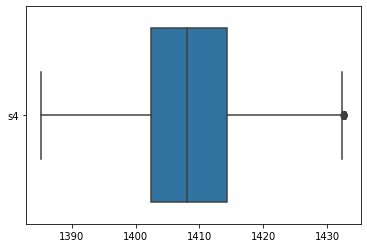

In [194]:
sns.boxplot( data = data_train[col_names], orient="h", order=['s4'])

<AxesSubplot:>

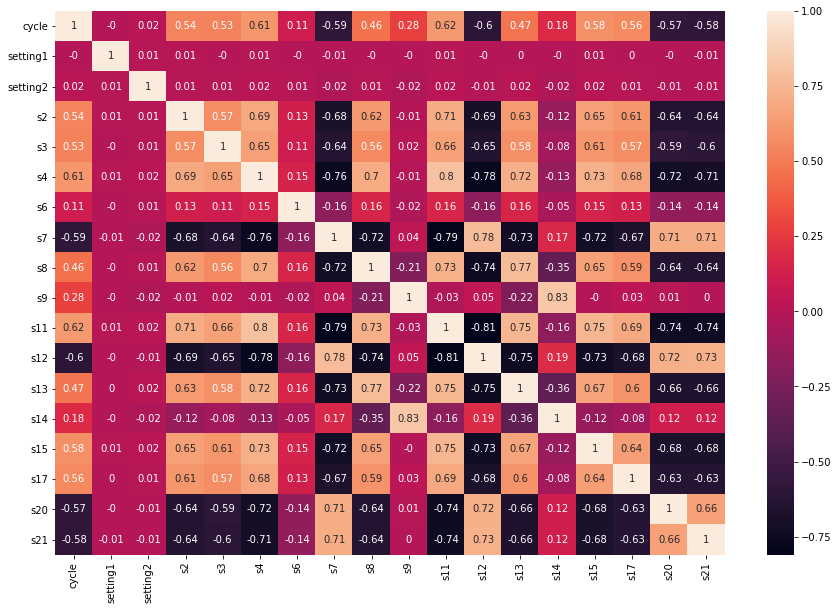

In [195]:
# we create a correlation matrix that measures the linear relationships between the variables.
correlation_matrix = data_train[col_train].corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, )